In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#load the data

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\train_set.csv")
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [3]:
#in this data we dont want every column for prediction , so we have to create new column only with meaningfull columns,

df=df[["OGC",'DC','Salaries',"Overtime","H/D","Total_Compensation"]]
df


,OGC,DC,Salaries,Overtime,H/D,Total_Compensation
0,4,DPH,12196,0,0.00,16158
1,4,DPH,74639,2820,12703.31,115784
2,6,ASR,100554,0,12424.50,144708
3,1,POL,140164,52754,13043.87,242323
4,2,HHP,58813,0,7655.28,82106
...,...,...,...,...,...,...
287831,3,DSS,78980,30115,13068.80,147079
287832,5,LIB,30704,0,5465.57,40174
287833,2,HHP,104451,0,13054.94,164669
287834,1,JUV,14425,0,4051.90,19594


<AxesSubplot:>

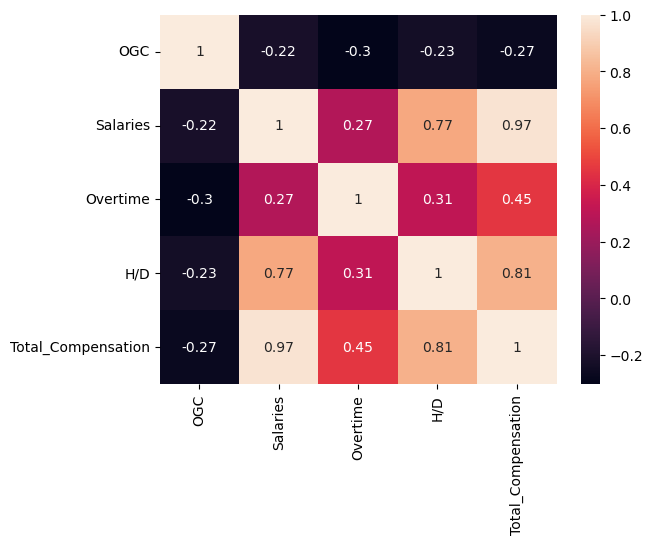

In [4]:
# From the data we can observe that there are many independent columns and only on independent column ("total compensation")

# so we can  use "Mutlitple linear regression"

# To check the linear reation we can use "heatmap",

sb.heatmap(df.corr(),annot=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overtime', ylabel='Total_Compensation'>

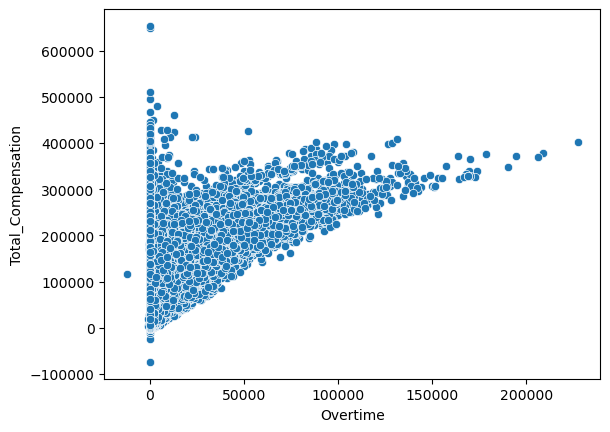

In [5]:
sb.scatterplot(df.Overtime,df.Total_Compensation)

# but in this data we cannot predict properly using the multiple linear regression , because we can see that while observing
# the scatter plot of overtime and total compensation we can clearly see proper retlation is there, but in the correlation metrx it is not showing a postitve and high relation because of the 0 values

# so we are decided to use "LOGISTIC REGRESSION"

# MISSING VALUE PREPROCESSING

In [6]:
df.isnull().sum()  

OGC                   0
DC                    0
Salaries              0
Overtime              0
H/D                   0
Total_Compensation    0
dtype: int64

# Feature encoding

In [ ]:
# TO convert the categorical column into the numerical we can use one_hot_encoding


In [7]:
df_ohe=pd.get_dummies(df[["DC"]])
df_ohe


,DC_AAM,DC_ADM,DC_ADP,DC_AIR,DC_ART,DC_ASR,DC_BOS,DC_CAT,DC_CFC,DC_CHF,...,DC_RET,DC_RNT,DC_SCI,DC_SHF,DC_TIS,DC_TTX,DC_UNA,DC_WAR,DC_WOM,DC_WTR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df=pd.concat([df,df_ohe],axis=1)
df

,OGC,DC,Salaries,Overtime,H/D,Total_Compensation,DC_AAM,DC_ADM,DC_ADP,DC_AIR,...,DC_RET,DC_RNT,DC_SCI,DC_SHF,DC_TIS,DC_TTX,DC_UNA,DC_WAR,DC_WOM,DC_WTR
0,4,DPH,12196,0,0.00,16158,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,DPH,74639,2820,12703.31,115784,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,ASR,100554,0,12424.50,144708,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,POL,140164,52754,13043.87,242323,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,HHP,58813,0,7655.28,82106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,3,DSS,78980,30115,13068.80,147079,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287832,5,LIB,30704,0,5465.57,40174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287833,2,HHP,104451,0,13054.94,164669,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287834,1,JUV,14425,0,4051.90,19594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df=df.drop(["DC"],axis=1)

In [10]:
df  # all variables are converted to numericals

,OGC,Salaries,Overtime,H/D,Total_Compensation,DC_AAM,DC_ADM,DC_ADP,DC_AIR,DC_ART,...,DC_RET,DC_RNT,DC_SCI,DC_SHF,DC_TIS,DC_TTX,DC_UNA,DC_WAR,DC_WOM,DC_WTR
0,4,12196,0,0.00,16158,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,74639,2820,12703.31,115784,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,100554,0,12424.50,144708,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,140164,52754,13043.87,242323,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,58813,0,7655.28,82106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,3,78980,30115,13068.80,147079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287832,5,30704,0,5465.57,40174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287833,2,104451,0,13054.94,164669,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287834,1,14425,0,4051.90,19594,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# feature scaling

In [ ]:
# we have to scale the unorderd variables;

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss


StandardScaler()

In [12]:
df[["OGC","Salaries","Overtime","H/D"]]=ss.fit_transform(df[["OGC","Salaries","Overtime","H/D"]])
df


,OGC,Salaries,Overtime,H/D,Total_Compensation,DC_AAM,DC_ADM,DC_ADP,DC_AIR,DC_ART,...,DC_RET,DC_RNT,DC_SCI,DC_SHF,DC_TIS,DC_TTX,DC_UNA,DC_WAR,DC_WOM,DC_WTR
0,0.649913,-1.144004,-0.397237,-1.825247,16158,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.649913,0.254853,-0.142704,0.770410,115784,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.919284,0.835405,-0.397237,0.713441,144708,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.254143,1.722754,4.364333,0.839996,242323,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.619458,-0.099683,-0.397237,-0.261050,82106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,0.015228,0.352101,2.320939,0.845090,147079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287832,1.284599,-0.729385,-0.397237,-0.708472,40174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287833,-0.619458,0.922706,-0.397237,0.842258,164669,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287834,-1.254143,-1.094070,-0.397237,-0.997326,19594,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# divide to x and y

In [13]:
X=df.drop(["Total_Compensation"],axis=1)
y=df["Total_Compensation"]

# split to train and test data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train

,OGC,Salaries,Overtime,H/D,DC_AAM,DC_ADM,DC_ADP,DC_AIR,DC_ART,DC_ASR,...,DC_RET,DC_RNT,DC_SCI,DC_SHF,DC_TIS,DC_TTX,DC_UNA,DC_WAR,DC_WOM,DC_WTR
129813,-0.619458,0.524172,-0.397237,0.814326,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242314,-1.254143,-0.313108,-0.329181,0.413193,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169723,1.284599,-0.292274,0.093416,0.226287,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42741,0.649913,-0.503549,-0.397237,0.131203,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174652,1.919284,1.280692,-0.397237,0.694842,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-1.254143,0.397913,0.052347,0.509119,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
259178,0.649913,0.890469,-0.397237,-0.517359,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,-0.619458,-0.975405,-0.390558,-0.862207,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146867,-0.619458,-0.416382,-0.397237,0.357491,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train

129813    123566
242314     79724
169723     82278
42741      65771
174652    184103
           ...  
119879    139667
259178    136787
131932     26042
146867     75626
121958    122649
Name: Total_Compensation, Length: 215877, dtype: int64

# import and fit logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo

LogisticRegression()

In [20]:
lo.fit(X_train,y_train)

MemoryError: Unable to allocate 213. GiB for an array with shape (215877, 132658) and data type int64

In [ ]:
# THE LOGICAL REGRESSION SHOWS MEMORY ERROR so , we have to use KNNregressor::::::

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=9)
knn

KNeighborsRegressor(n_neighbors=9)

In [33]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [34]:
#y_pred=
knn.predict(X_test)  # runnig for so long time
#y_pred

KeyboardInterrupt: 

In [ ]:
#" i dont know what is happenig with this problems,it is not working with knn regressor and logistic regression"

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn

KNeighborsClassifier(n_neighbors=9)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [38]:
knn.predict(X_test)   # running for so long time

KeyboardInterrupt: 

In [ ]:
# not working with knn classifier also